In [113]:

!pip install nltk pandas yake multi_rake keybert

In [114]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

URL = "https://ost.ecosyste.ms/api/v1/projects?reviewed=true&per_page=3000"
FILE_TO_SAVE_AS = "projects.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [115]:
raw = pd.read_json(resp.content.decode())
print(raw.shape)
raw.head()

(1932, 29)


,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,citation_counts,total_citations,project_url,html_url
0,12280,BioDiversityHub BC,The source of British Columbia's species inven...,https://github.com/bcgov/biohubbc,2024-06-01 13:32:28.270000+00:00,"{'id': 37059458, 'uuid': '295840928', 'full_na...","{'login': 'bcgov', 'name': 'Province of Britis...",[],"{'full_name': 'bcgov/biohubbc', 'default_branc...","{'full_name': 'bcgov/biohubbc', 'html_url': 'h...","{'total': {'ForkEvent': 11, 'CreateEvent': 123...","[biodiversity, biohub, env, express, flnr, fln...","[{'ecosystem': 'actions', 'filepath': '.github...",6.040255,2023-09-11 14:41:13.598000+00:00,2024-06-01 13:32:28.273000+00:00,https://github.com/bcgov.png,TypeScript,Biosphere,Biodiversity and Species Distribution,0,[![img](https://img.shields.io/badge/Lifecycle...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/12280,https://ost.ecosyste.ms/projects/12280
1,112510,Dataland,A decentralized ecosystem for raw ESG-data whe...,https://github.com/d-fine/dataland,2024-06-01 13:32:02.939000+00:00,"{'uuid': '456887709', 'full_name': 'd-fine/Dat...","{'login': 'd-fine', 'name': 'd-fine GmbH', 'uu...",[],"{'full_name': 'd-fine/dataland', 'default_bran...","{'full_name': 'd-fine/dataland', 'html_url': '...","{'total': {'ForkEvent': 4, 'CreateEvent': 688,...",[],"[{'ecosystem': 'maven', 'filepath': 'dataland-...",6.006353,2023-10-08 00:08:55.379000+00:00,2024-06-01 13:32:02.940000+00:00,https://github.com/d-fine.png,TypeScript,Sustainable Development,Sustainable Investment,0,# Dataland\nDataland is a platform to distribu...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/112510,https://ost.ecosyste.ms/projects/112510
2,76489,ecobalyse,Ecobalyse makes it possible to understand and ...,https://github.com/mtes-mct/ecobalyse,2024-06-01 13:31:52.422000+00:00,"{'uuid': '397646672', 'full_name': 'MTES-MCT/e...","{'login': 'MTES-MCT', 'name': 'Ministère de la...",[],"{'full_name': 'MTES-MCT/ecobalyse', 'default_b...","{'full_name': 'MTES-MCT/ecobalyse', 'html_url'...","{'total': {'CreateEvent': 441, 'CommitCommentE...","[carbon-emissions, carbon-footprint, environme...","[{'ecosystem': 'actions', 'filepath': '.github...",5.799093,2023-09-19 00:02:07.287000+00:00,2024-06-01 13:31:52.425000+00:00,https://github.com/MTES-MCT.png,Elm,Industrial Ecology,Life Cycle Assessment,0,# Ecobalyse ![Build status](https://github.com...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/76489,https://ost.ecosyste.ms/projects/76489
3,46159,QA4SM,Provides an operational online validation serv...,https://github.com/awst-austria/qa4sm,2024-06-01 13:31:51.710000+00:00,"{'id': 37095677, 'uuid': '172907553', 'full_na...","{'login': 'awst-austria', 'name': 'AWST GmbH',...",[],"{'full_name': 'awst-austria/qa4sm', 'default_b...","{'full_name': 'awst-austria/qa4sm', 'html_url'...","{'total': {'ForkEvent': 14, 'CreateEvent': 256...",[],"[{'ecosystem': 'npm', 'filepath': 'UI/package-...",5.411646,2023-09-13 08:45:18.881000+00:00,2024-06-01 13:31:51.712000+00:00,https://github.com/awst-austria.png,Python,Natural Resources,Soil and Land,0,# QA4SM\nSource code repository for the QA4SM ...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/46159,https://ost.ecosyste.ms/projects/46159
4,20600,IPCC AR6 Chapter 9 Figures,Code and data for all figures from Chapter 9 o...,https://github.com/IPCC-WG1/Chapter-9,2024-06-01 13:31:40.070000+00:00,"{'uuid': '397222147', 'full_name': 'IPCC-WG1/C...","{'login': 'IPCC-WG1', 'name': 'IPCC-WG1', 'uui...",[],"{'full_name': 'IPCC-WG1/Chapter-9', 'default_b...","{'full_name': 'IPCC-WG1/Chapter-9', 'html_url'...","{'total': {'CreateEvent': 1, 'IssuesEvent': 1,...",[],[],6.276643,2023-09-11 14:52:13.844000+00:00,2024-06-01 13:31:40.073000+00:00,https://github.com/IPCC-WG1.png,MATLAB,Cli

In [116]:
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 50)

#https://www.nltk.org/
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stpwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [117]:
len(raw)

1932

# 1. Goal: Reduce the list of topics below into subtopics


In [118]:
raw['category'].value_counts()

category
Biosphere                  273
Consumption                267
Climate Change             234
Energy Systems             207
Natural Resources          173
Sustainable Development    166
Hydrosphere                135
Renewable Energy           127
Atmosphere                 123
Emissions                   90
Industrial Ecology          53
Cryosphere                  49
Energy Storage              35
Name: count, dtype: int64

In [119]:
raw['sub_category'].value_counts()

sub_category
Energy Modeling and Optimization            117
Biodiversity and Species Distribution        79
Water Supply                                 79
Mobility and Transportation                  73
Buildings and Heating                        70
Agriculture and Nutrition                    66
Soil and Land                                64
Photovoltaics and Solar Energy               59
Climate Data Processing and Analysis         56
Forest Observation and Management            55
Freshwater and Hydrology                     54
Computation and Communication                53
Meteorological Observation and Forecast      51
Marine Life and Fishery                      49
Earth and Climate Modeling                   48
Emission Observation and Modeling            47
Natural Hazard and Storm                     45
Energy Distribution and Grids                43
Climate Data Access and Visualization        43
Data Catalogs and Interfaces                 43
Wind Energy                

In [120]:
df = raw[['name','description','category','sub_category','owner','readme']]
df.head()

,name,description,category,sub_category,owner,readme
0,BioDiversityHub BC,The source of British Columbia's species inven...,Biosphere,Biodiversity and Species Distribution,"{'login': 'bcgov', 'name': 'Province of Britis...",[![img](https://img.shields.io/badge/Lifecycle...
1,Dataland,A decentralized ecosystem for raw ESG-data whe...,Sustainable Development,Sustainable Investment,"{'login': 'd-fine', 'name': 'd-fine GmbH', 'uu...",# Dataland\nDataland is a platform to distribu...
2,ecobalyse,Ecobalyse makes it possible to understand and ...,Industrial Ecology,Life Cycle Assessment,"{'login': 'MTES-MCT', 'name': 'Ministère de la...",# Ecobalyse ![Build status](https://github.com...
3,QA4SM,Provides an operational online validation serv...,Natural Resources,Soil and Land,"{'login': 'awst-austria', 'name': 'AWST GmbH',...",# QA4SM\nSource code repository for the QA4SM ...
4,IPCC AR6 Chapter 9 Figures,Code and data for all figures from Chapter 9 o...,Climate Change,Climate Data Access and Visualization,"{'login': 'IPCC-WG1', 'name': 'IPCC-WG1', 'uui...",[![DOI](https://zenodo.org/badge/DOI/10.5281/z...


# 2. Sample Row

In [121]:
import re
import yake

In [122]:
# Removing words
words_black_list = ['python','pvlib','projects','affiliated','http','readthedocs','benchmarks','license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','google','documentation','please']

## Yake for keyword Extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

## Rake for keyword Extracion

In [123]:
from multi_rake import Rake

## KeyBERT for keyword extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

In [124]:
from keybert import KeyBERT

In [125]:
kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

# 3. Cleaning Full Dataset

In [126]:
# Fill null values with 'None'. This will allow us to concatenate the relevant text columns
df = df.fillna('None')

In [127]:
# Combine text columns
combined = df['description']

In [128]:
df['combined'] = combined
df.head()

,name,description,category,sub_category,owner,readme,combined
0,BioDiversityHub BC,The source of British Columbia's species inven...,Biosphere,Biodiversity and Species Distribution,"{'login': 'bcgov', 'name': 'Province of Britis...",[![img](https://img.shields.io/badge/Lifecycle...,The source of British Columbia's species inven...
1,Dataland,A decentralized ecosystem for raw ESG-data whe...,Sustainable Development,Sustainable Investment,"{'login': 'd-fine', 'name': 'd-fine GmbH', 'uu...",# Dataland\nDataland is a platform to distribu...,A decentralized ecosystem for raw ESG-data whe...
2,ecobalyse,Ecobalyse makes it possible to understand and ...,Industrial Ecology,Life Cycle Assessment,"{'login': 'MTES-MCT', 'name': 'Ministère de la...",# Ecobalyse ![Build status](https://github.com...,Ecobalyse makes it possible to understand and ...
3,QA4SM,Provides an operational online validation serv...,Natural Resources,Soil and Land,"{'login': 'awst-austria', 'name': 'AWST GmbH',...",# QA4SM\nSource code repository for the QA4SM ...,Provides an operational online validation serv...
4,IPCC AR6 Chapter 9 Figures,Code and data for all figures from Chapter 9 o...,Climate Change,Climate Data Access and Visualization,"{'login': 'IPCC-WG1', 'name': 'IPCC-WG1', 'uui...",[![DOI](https://zenodo.org/badge/DOI/10.5281/z...,Code and data for all figures from Chapter 9 o...


In [129]:
# Words to remove from column. We will keep adding to this list the more words we find that are irrelavent
words_black_list = ['python','projects','affiliated','http','readthedocs','benchmarks',
                    'license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','users','using'
                    'google','documentation','please','github','data','model','install','code',
                    'package','badge','project']

In [149]:
# More words to remove
words_black_list = ['python','tool','based','pvlib','projects','affiliated','http','readthedocs','benchmarks','aims','high','series','functions','large','calculate','applications','flow','easy','contains','state','collection','real','flexsible','program','implementation','evaluate','track','engineering',
                    'license','matlab','user','guide','html','https','open','source','journal','various','written','toolbox','working','design','related','level','deep','standard','within','applications','methods','toolkits','multi','network','coupled','platform','application','developed','possible',
                    'latest','release','build','publications','conda','installed','users','using','julia','different','toolkit','toolkit','provide','focus','smart','simple','enables','sources','client','advanced','digital','across','suite','domain','estimate','evaluation','measurements','statistical',
                    'google','documentation','please','github','data','model','install','code','numerical','simulation','algorithms','driven','interactive','helps', 'package','resolution','visualization','images','explore','develop','analysis','distributed','calculations','global','control','accessible',
                    'package','badge','project','version','file','view','system','master','used','also','providing','enable','multiple','point','image','process','including','components','computer','easily','built','range','line','calculations','term','uses','faciliate','online','study','evaluate',
                    'repository','example','docs','files','information','models','software','available','work','making','visualize','format','load','usage','module','apis','automated','temporal','curated','variable','best','variables','websites','sets','near','worldwide','automatic','problems',
                    'zenodo','command','modis','pull','request','pctl','theoj','brodiepearson','blob','getting','order','fast','daily','makes','domaine','around','processes','associated','long','type','clean','optimal','many','awesome','extract','three','variety','useful','inventory','allowing',
                    'started','machine','learning','make','sure','pypi','ipcc','main','scholor','colorado','codecov','individual','researchers','historical','metadata','supporting','finite','analyze','databases','chemical','initiative','technologies','collect','hourly','given','solver','space',
                    'none','jupyter','notebook','united','states','docker','anaconda','forge','datasets','false','would','reference','tracking','identify','general','techniques','scripts','world','libraries','estimating','neutral','response','algorithm','ground','retrieving','retrieve','quantitative',
                    'like','gustavoirgang','google','collab','sciencedirect','yaml','downloads','actions','workflows', 'understanding','international','compute','gridded','studies','single','calculates','exchange','potential','robust','dimensional','reporting','development','simulations','flexsible',
                    'media','icon','joss','papers','legend','description','jobs','download','input','output','latitude','longitude','analyse','measurement','directly','official','sheet','classifications','find','features','computational','operations','grids','includes','text','standardized','dedicated','easier','purpose',
                    'unit','tests','cran','nbsp','colab','check','plot','ncss','contributing','installation', 'instructions','fortran','complex','simulating','component','access','bottom','flexible','search','agent','results','needed','creating','friendly','basic','linear','assess','wrapper','defined','wide','method',
                    'wiki','wikipedia','feel','free','name','list','issues','start','examples','index','dataset','branch','create','high','performance','management','scale','website','codes','programs','downnloading','utility','imagery','events','websites','share','solutions','published',
                    'library','following','test','running','import','database','access','packages','directory','need','tools','simulation','time','framework','systems','designed','community','interface','optimization','allows','support','grid','research','processing','help','provides']

In [150]:
len(words_black_list)

349

In [151]:
# Create new column called "cleaned_text" and apply different cleaning methods
df['cleaned_text'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list)) # Remove words from blacklist
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords


In [152]:
df['cleaned_text']

0                                british columbia species
1       decentralized ecosystem market participants tr...
2       ecobalyse possible understand ecological impac...
3       operational validation service soil moisture p...
4                                         figures chapter
                              ...                        
1927    modelling crop diseases susceptible exposed in...
1928    outputs current phase intercomparison cmip cli...
1929    groundwater surface water integration usgs pre...
1930    calculating spatial indicators healthy sustain...
1931             wrapper setup hydrologic modelling raven
Name: cleaned_text, Length: 1932, dtype: object

# 4. Unique Words

* Let's get a look at the most common words in our cleaned_text column

In [153]:
from collections import Counter

# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df['cleaned_text']]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

In [154]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(400)
word_freq

[('energy', 285),
 ('climate', 219),
 ('modeling', 109),
 ('water', 109),
 ('power', 99),
 ('earth', 79),
 ('carbon', 79),
 ('weather', 79),
 ('environmental', 78),
 ('emissions', 68),
 ('wind', 64),
 ('ocean', 57),
 ('atmospheric', 54),
 ('change', 53),
 ('soil', 52),
 ('electricity', 50),
 ('building', 49),
 ('solar', 48),
 ('land', 47),
 ('assessment', 47),
 ('surface', 46),
 ('science', 43),
 ('quality', 43),
 ('species', 41),
 ('forest', 41),
 ('integrated', 36),
 ('consumption', 36),
 ('national', 34),
 ('environment', 33),
 ('biodiversity', 32),
 ('monitoring', 30),
 ('modelling', 30),
 ('marine', 29),
 ('satellite', 29),
 ('transport', 29),
 ('meteorological', 29),
 ('forecasting', 29),
 ('impact', 28),
 ('generation', 28),
 ('plant', 27),
 ('plants', 27),
 ('well', 27),
 ('tree', 26),
 ('atmosphere', 25),
 ('greenhouse', 25),
 ('services', 25),
 ('common', 25),
 ('battery', 25),
 ('impacts', 24),
 ('european', 24),
 ('distribution', 24),
 ('dynamics', 23),
 ('cycle', 23),
 ('s

In [155]:
!pip install wordcloud

In [156]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

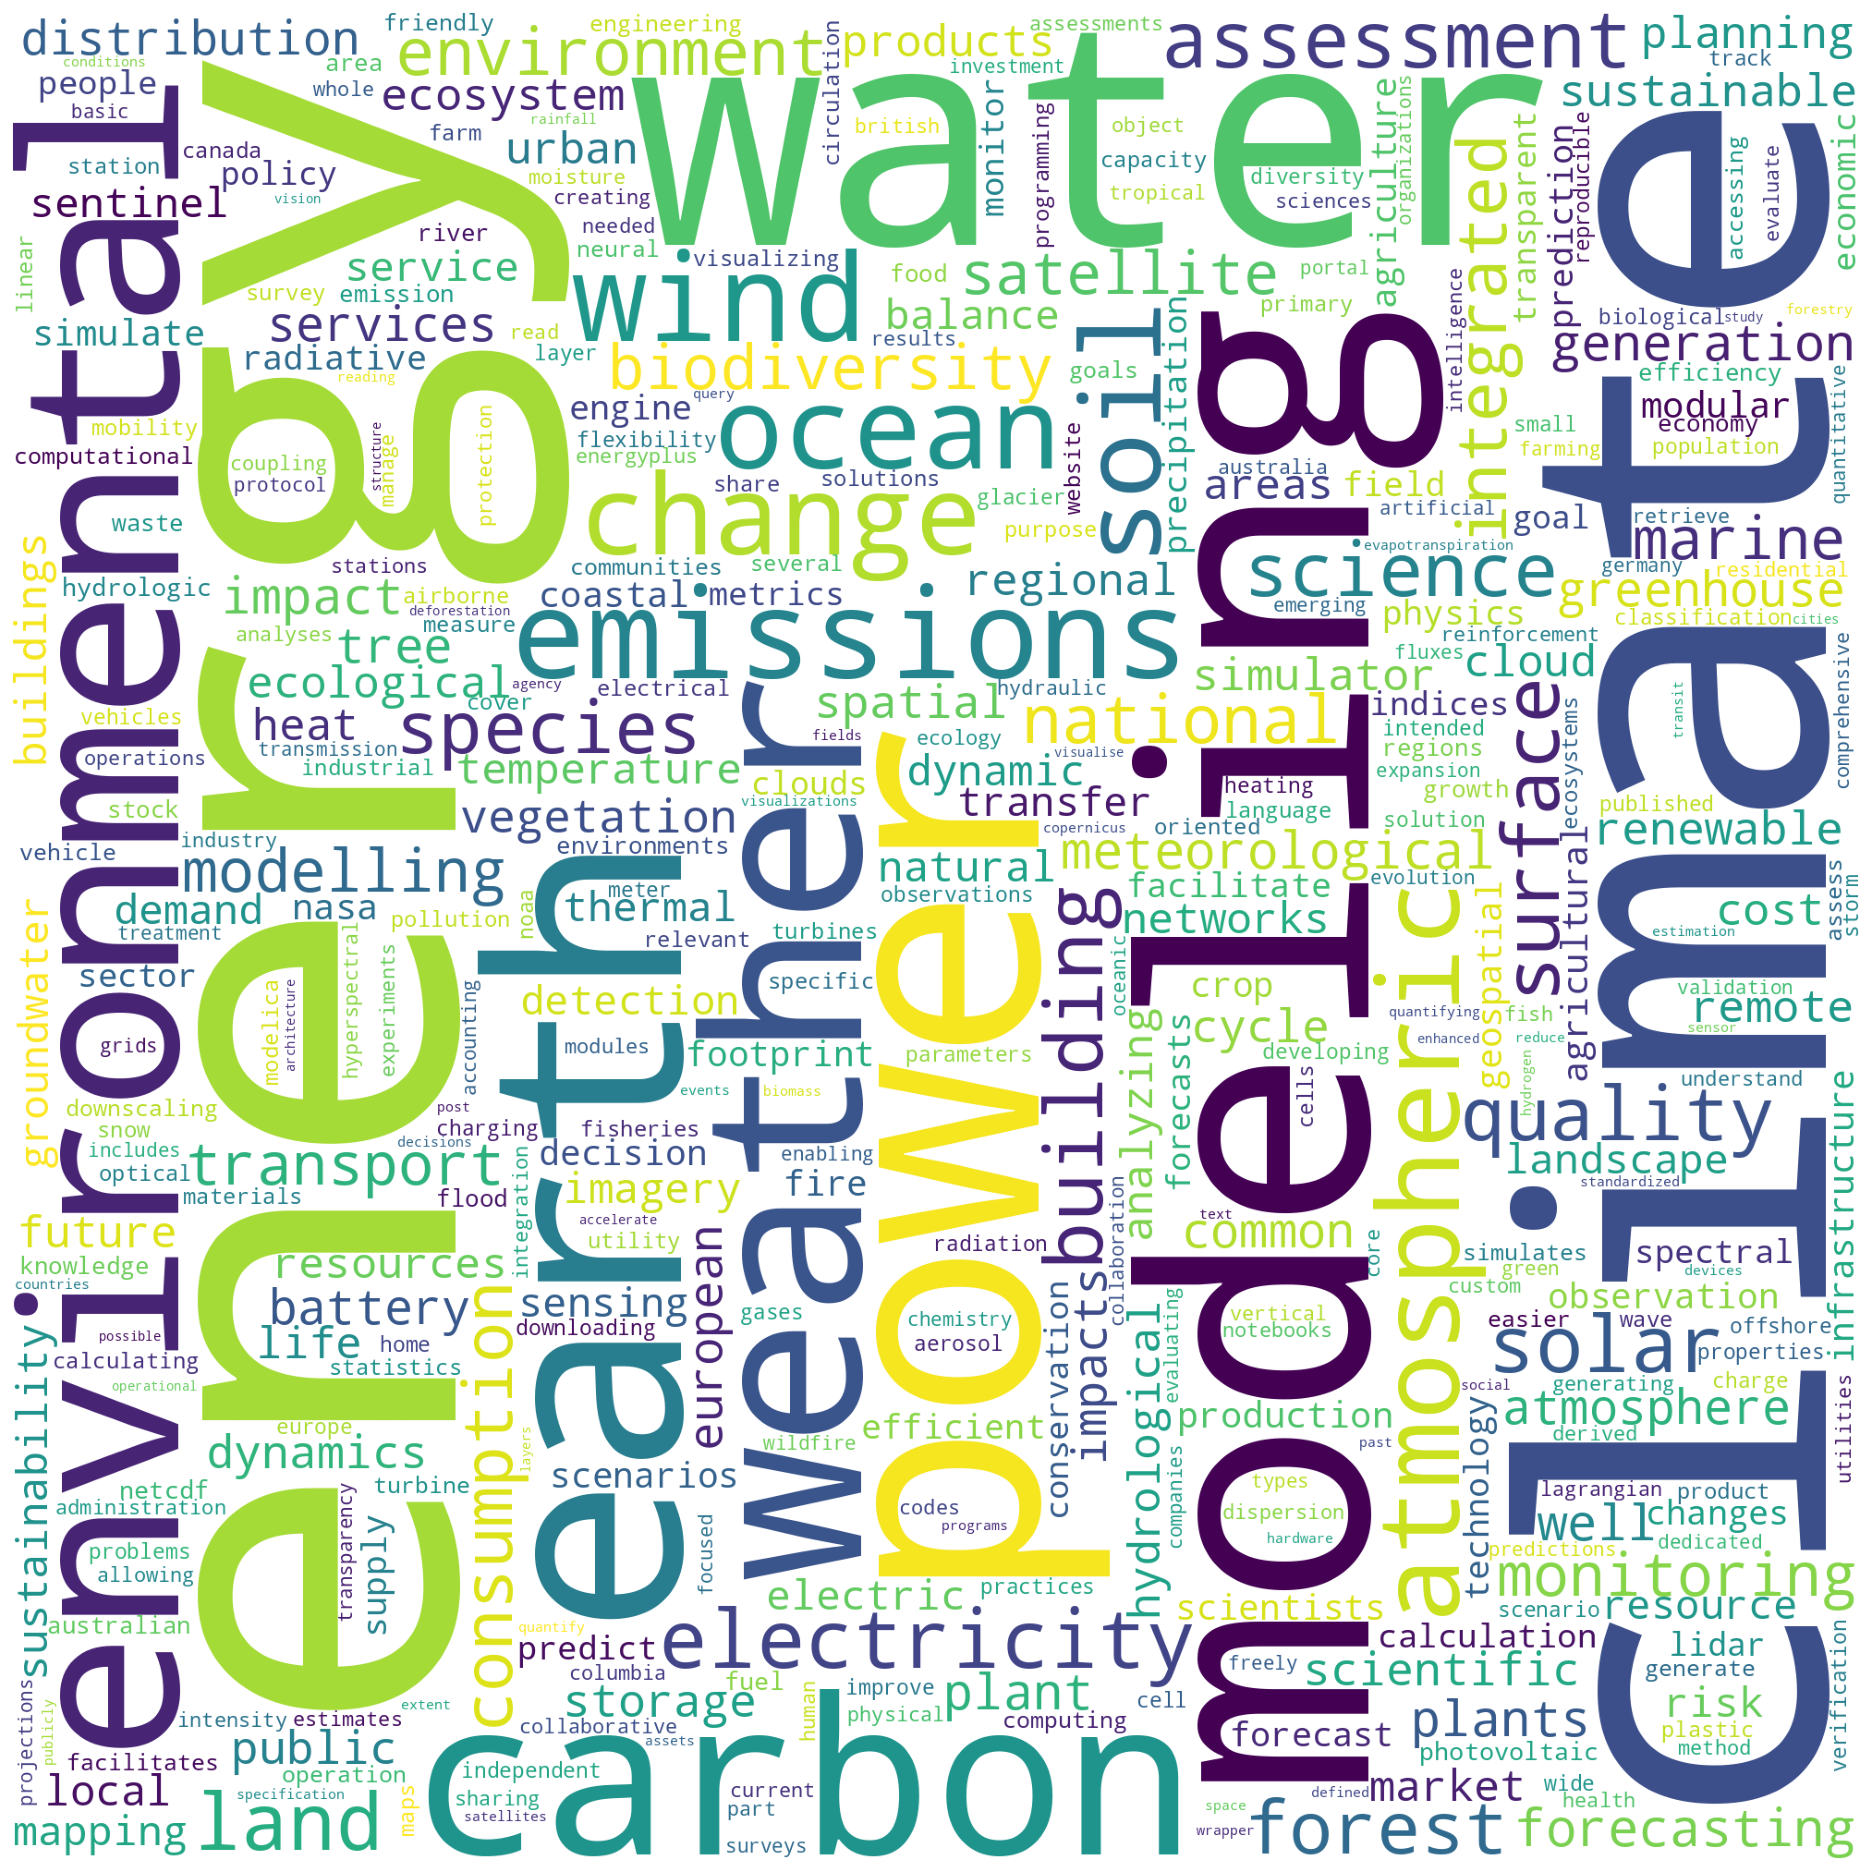

In [157]:
wc = WordCloud(background_color="white", max_words=500,width=2000,height=2000,relative_scaling=0.5)
wc.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

# 5. Unique Bigrams and Trigrams

* We should also look at the most common bigrams and trigrams

In [138]:
df['cleaned_text'].str.split()

0                 [british, columbia, species, inventory]
1       [decentralized, ecosystem, market, participant...
2       [ecobalyse, possible, understand, ecological, ...
3       [operational, validation, service, soil, moist...
4                                      [figures, chapter]
                              ...                        
1927    [modelling, crop, diseases, susceptible, expos...
1928    [outputs, current, phase, intercomparison, cmi...
1929    [groundwater, surface, water, integration, usg...
1930    [calculating, spatial, indicators, healthy, su...
1931       [wrapper, setup, hydrologic, modelling, raven]
Name: cleaned_text, Length: 1932, dtype: object

In [139]:
# Create list of words in the order in which they orignally appear
words = list(df['cleaned_text'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [140]:
len(words)

13088

In [141]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts()).to_frame('count')

In [142]:
bigrams.head(30)

,count
"(climate, change)",34
"(energy, consumption)",20
"(remote, sensing)",17
"(renewable, energy)",16
"(water, quality)",15
"(life, cycle)",15
"(radiative, transfer)",14
"(energy, modeling)",13
"(weather, climate)",12
"(integrated, assessment)",11


In [143]:
# Most frequent trigrams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:100]

(life, cycle, assessment)                    9
(environment, climate, change)               4
(climate, change, canada)                    4
(detection, airborne, hyperspectral)         3
(past, present, future)                      3
(improve, energy, efficiency)                3
(netcdf, scientific, freely)                 3
(form, netcdf, scientific)                   3
(fisheries, stock, assessment)               3
(climate, carbon, cycle)                     3
(common, form, netcdf)                       3
(unidata, common, form)                      3
(atmospheric, oceanic, climate)              3
(wind, energy, wind)                         3
(groundwater, surface, water)                3
(whole, building, energy)                    3
(integer, linear, programming)               3
(mixed, integer, linear)                     3
(wind, speed, direction)                     3
(nasa, earth, science)                       3
(concentrating, solar, power)                2
(copernicus, 

#6. Further Work

* Further reduce the number of unique keywords by removing irrelevant words
* Create a list of topics/subtopics that we want
* Define features (words, bigrams, trigrams)
* cosine similarity to get similar projects
